In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as st

In [2]:
#reading a file and adding column names to it.
names=['symboling','norm_losses','brand','fuel','aspiration','doors','body_style','drive_wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
data = pd.read_csv('../Data/automobile.csv',header=None,names=names)
data.head()


,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**There are some cells having '?' values in the dataset. So, we are replacing those valuses with NaN values. So, that will be useful in finding totla null values present in dataset.**

In [3]:
data = data.replace('?',np.NaN)
data.head()


,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#knowing types of data types
data.dtypes

symboling              int64
norm_losses           object
brand                 object
fuel                  object
aspiration            object
doors                 object
body_style            object
drive_wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [5]:
# finding total null values present in each columns.
data.isnull().sum()

symboling             0
norm_losses          41
brand                 0
fuel                  0
aspiration            0
doors                 2
body_style            0
drive_wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Changing null values with mean

```
    1. For norm_losses column as there 41 rows present with NaN value.
```

In [6]:
data1 = data[data.norm_losses.notnull()]

In [7]:
mean = data1.norm_losses.astype(int).mean()
mean
type(mean)

float

In [8]:
data.norm_losses = data.norm_losses.replace(np.NaN,mean).astype(int)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


```
    2. For price column as it has four column having NaN values.
```

In [9]:
data2 = data[data.price.notnull()]

In [10]:
mean = data2.price.astype(int).mean()
mean
type(mean)

float

In [11]:
data.price = data.price.replace(np.NaN,mean).astype(int)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


```
    3. For horsepower column as it has four column having NaN values.
```

In [12]:
data3 = data[data.horsepower.notnull()]

In [13]:
mean = data3.horsepower.astype(int).mean()
mean 
type(mean)

float

In [14]:
data.horsepower = data.horsepower.replace(np.NaN,mean).astype(int)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
data4 = data[data.bore.notnull()]

In [16]:
mean = data4.bore.astype(float).mean()
mean 
type(mean)

float

In [17]:
data.bore = data.bore.replace(np.NaN,mean)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
data5 = data[data.stroke.notnull()]

In [19]:
mean = data5.stroke.astype(float).mean()
mean 
type(mean)

float

In [20]:
data.stroke = data.stroke.replace(np.NaN,mean)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
data6 = data[data['peak-rpm'].notnull()]

In [22]:
mean = data6['peak-rpm'].astype(float).mean()
mean 
type(mean)

float

In [23]:
data['peak-rpm'] = data['peak-rpm'].replace(np.NaN,mean)
data.head()

,symboling,norm_losses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Statistics of data

In [24]:
data.describe()

,symboling,norm_losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.253659,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.519219,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [25]:
data.to_csv('../Data/processed_data_Automobile.csv', sep='\t', encoding='utf-8')

## Analysing the skew and outliers in the dataset

In [26]:
data.skew()

symboling            0.211072
norm_losses          0.854802
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
bore                 0.020211
stroke              -0.689784
compression-ratio    2.610862
horsepower           1.397954
peak-rpm             0.073591
city-mpg             0.663704
highway-mpg          0.539997
price                1.827325
dtype: float64

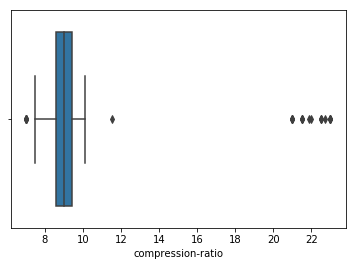

In [27]:
sns.boxplot(x=data['compression-ratio'])

```
    This box plot is done with respect to 'Compression-ratio' attribute.
    
    In the above box plot, there are some values present outside the box. So, there are so many outliers 
    present in the column 'compression-ratio'.
```

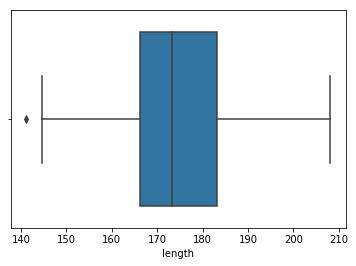

In [28]:
sns.boxplot(x=data['length'])

```
    Above box-plot is done with respect to 'Length' column.
    There are not much outliers present in the column 'Length'.
```

## Automobile brand freq diagram

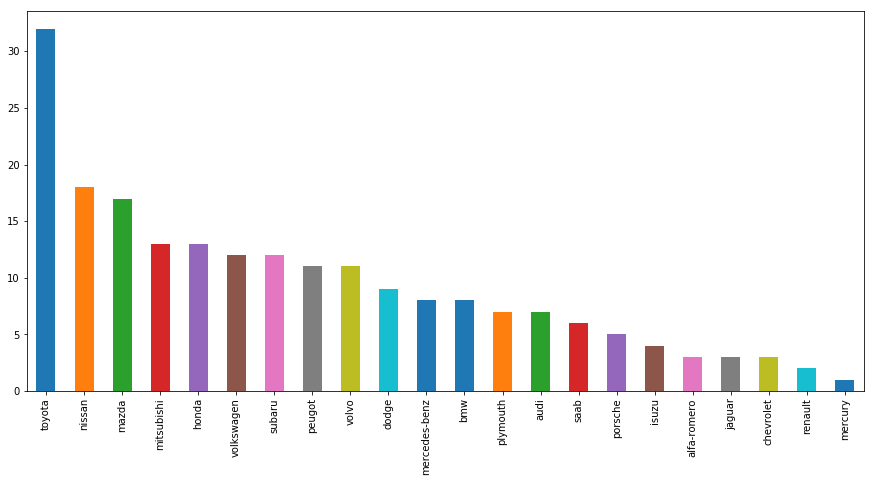

In [29]:
data.brand.value_counts().plot(kind='bar',figsize=(15,7))


** Observation: Toyota car company have the highest number of model compared to others.**

## Risk ratings diagram

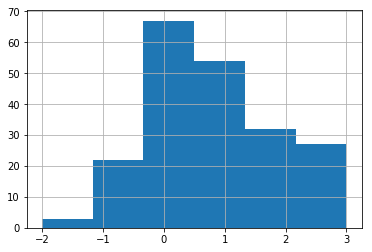

In [30]:
#data.symboling.value_counts().plot(kind='hist')
data.symboling.hist(bins=6)


** Observation: Most of the cars have higher risk ratings. There are more cars in the range of 0 and 1 **

# Analysing brand's cars safetyness
``` 
    -2 = pretty safe
    -1 = safe
     0  = average safe
     1  = average risky
     2  = risky
     3  = more risky
```

In [31]:
data.groupby('brand').symboling.value_counts().unstack()

symboling,-2,-1,0,1,2,3
brand,,,,,,
alfa-romero,NaN,NaN,NaN,1.0,NaN,2.0
audi,NaN,NaN,1.0,3.0,3.0,NaN
bmw,NaN,NaN,6.0,1.0,1.0,NaN
chevrolet,NaN,NaN,1.0,1.0,1.0,NaN
dodge,NaN,1.0,NaN,7.0,NaN,1.0
honda,NaN,NaN,7.0,4.0,2.0,NaN
isuzu,NaN,NaN,2.0,1.0,1.0,NaN
jaguar,NaN,NaN,3.0,NaN,NaN,NaN
mazda,NaN,NaN,6.0,7.0,NaN,4.0


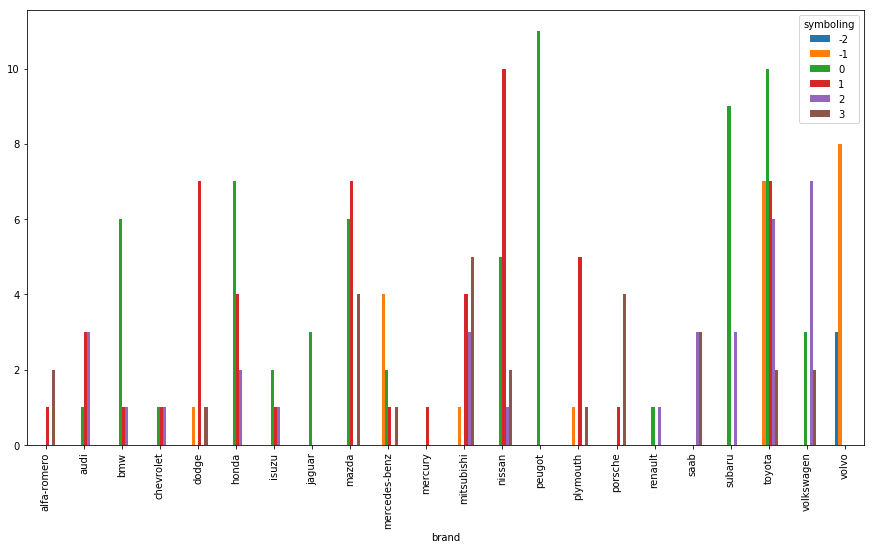

In [32]:
data.groupby('brand').symboling.value_counts().unstack().plot(kind='bar',figsize= (15,8))

```
    Observation is that volvo is the brand who has made more number of higher safety cars than other brands. 
```  

# Figuring out which aspiration system mostly used in each brand
``` 
    Two types of aspiration system: 1. Standard
                                    2. Turbo
```

In [33]:
data.groupby('brand').aspiration.value_counts().unstack().head()

aspiration,std,turbo
brand,,
alfa-romero,3.0,NaN
audi,5.0,2.0
bmw,8.0,NaN
chevrolet,3.0,NaN
dodge,6.0,3.0


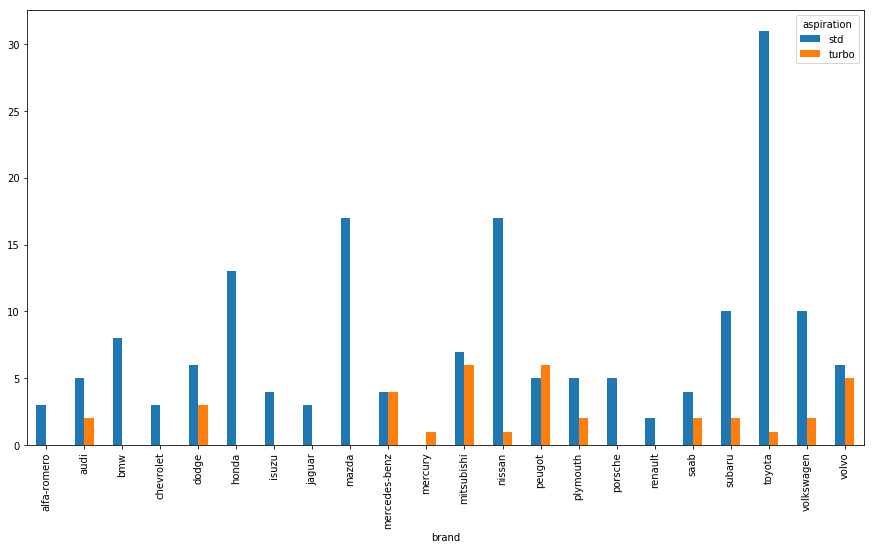

In [34]:
data.groupby('brand').aspiration.value_counts().unstack().plot(kind='bar',figsize= (15,8))


``` 
    From the above, we can see that mostly all brand are using standard aspiration system based car rather than turbo aspiration system based car.
```

# Price ranges according to car's features

### Price ranges according to Body styles

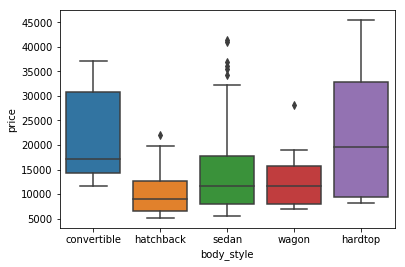

In [35]:
g = sns.boxplot(x="body_style", y="price", data=data)

### Price ranges according to brand

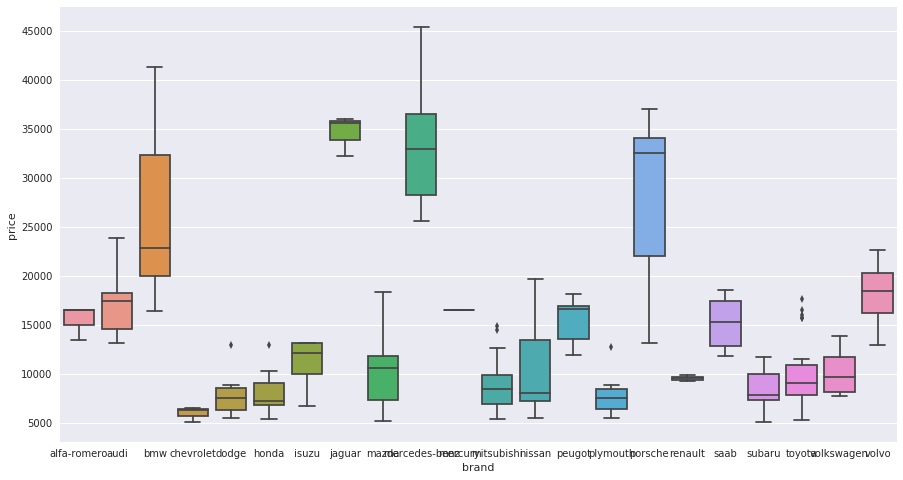

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.boxplot(x="brand", y="price", data=data)

### Observation:
```
    The most expensive car is manufactured by Mercedes benz and the least expensive car is manufactured by Chevrolet.
    BMW, Jaquar, Mercedes benz and Porsche cars cost more than 20,000.
```

### Price ranges according to engine-size

/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


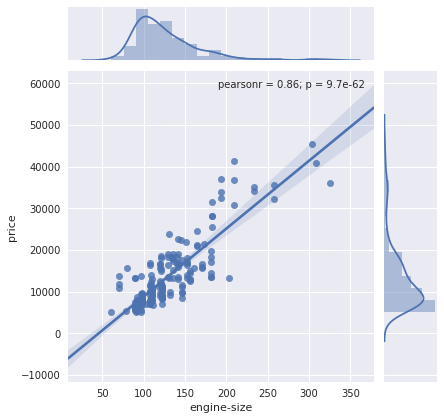

In [37]:
g = sns.jointplot(x = 'engine-size',y = 'price',data = data, kind = 'reg')

```
    From the graph, we can see that engine-size is directly proportional to price.
```

   ### Price ranges according to wheel base

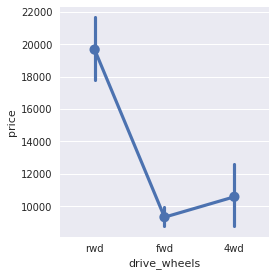

In [38]:
x = sns.factorplot("drive_wheels","price",data = data)

### Observation: 
```
    It is clear that Real Wheel Drive cars are most expensive car and Forward Wheel Drive cars are less expe-nsive.
```

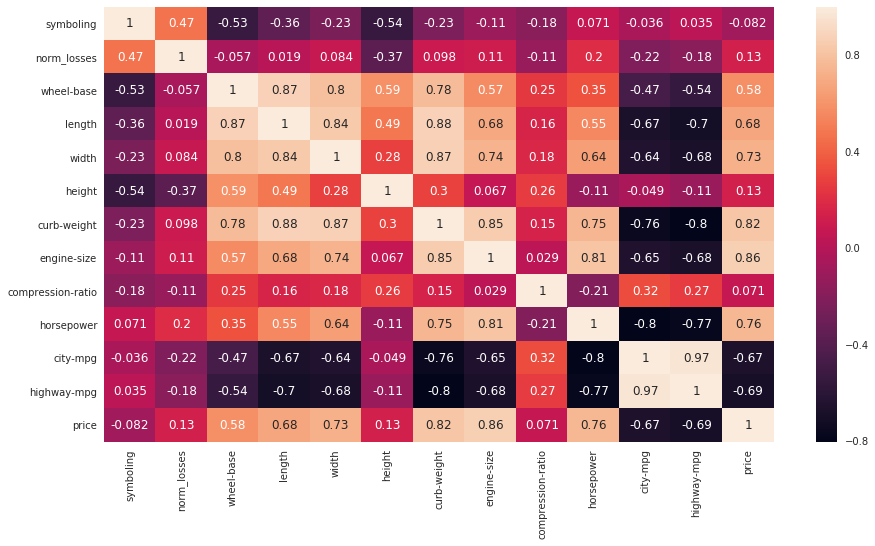

In [39]:
x = sns.heatmap(data.corr(),annot=True)

### Observation:
```
1. Wheel base is high correlated with length and width of the car.
2. Curb weight has more correlation with engine size, length, width and wheel based.
3. Price is more correlated with engine size and curb weight of the car.
```
